In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Loan approval prediction.csv')

In [ ]:
df.shape

(58645, 13)

In [ ]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df['loan_status'].value_counts()    ## imbalancing

,count
loan_status,
0,50295
1,8350


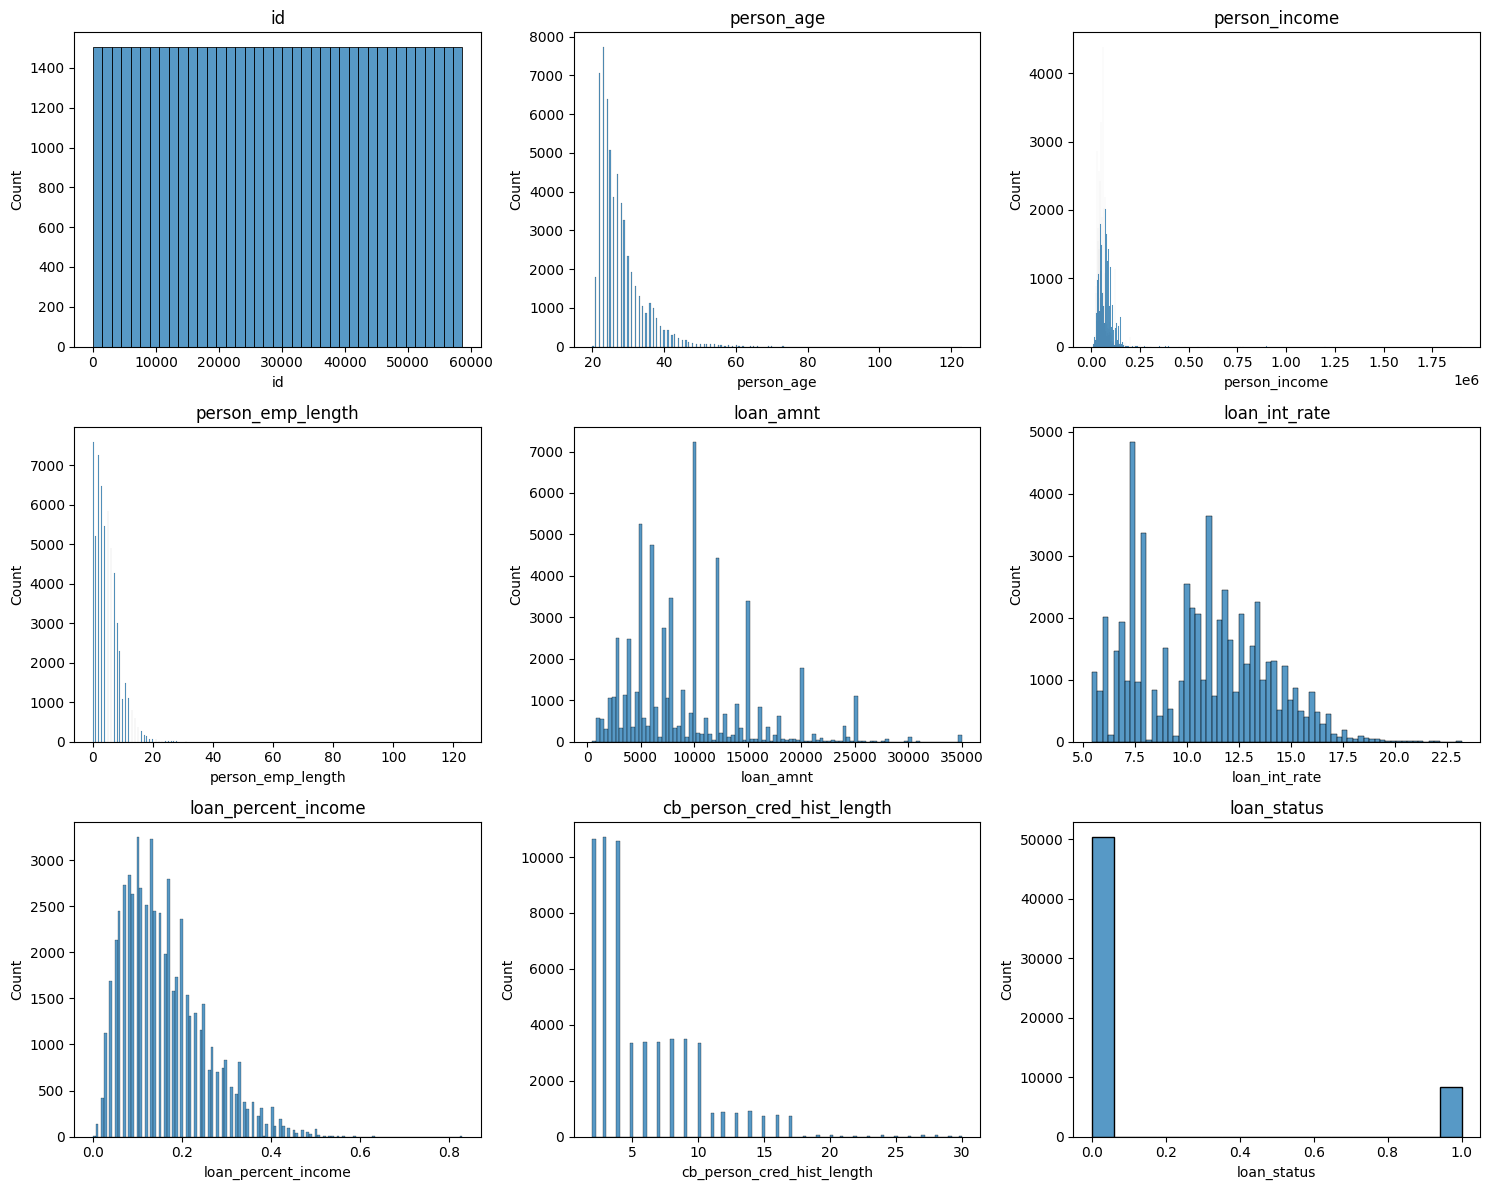

In [ ]:

## histogram
fig, axes = plt.subplots(3,3 , figsize=(15, 3 * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(df.select_dtypes(include='number').columns):
    sns.histplot(df.select_dtypes(include='number')[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


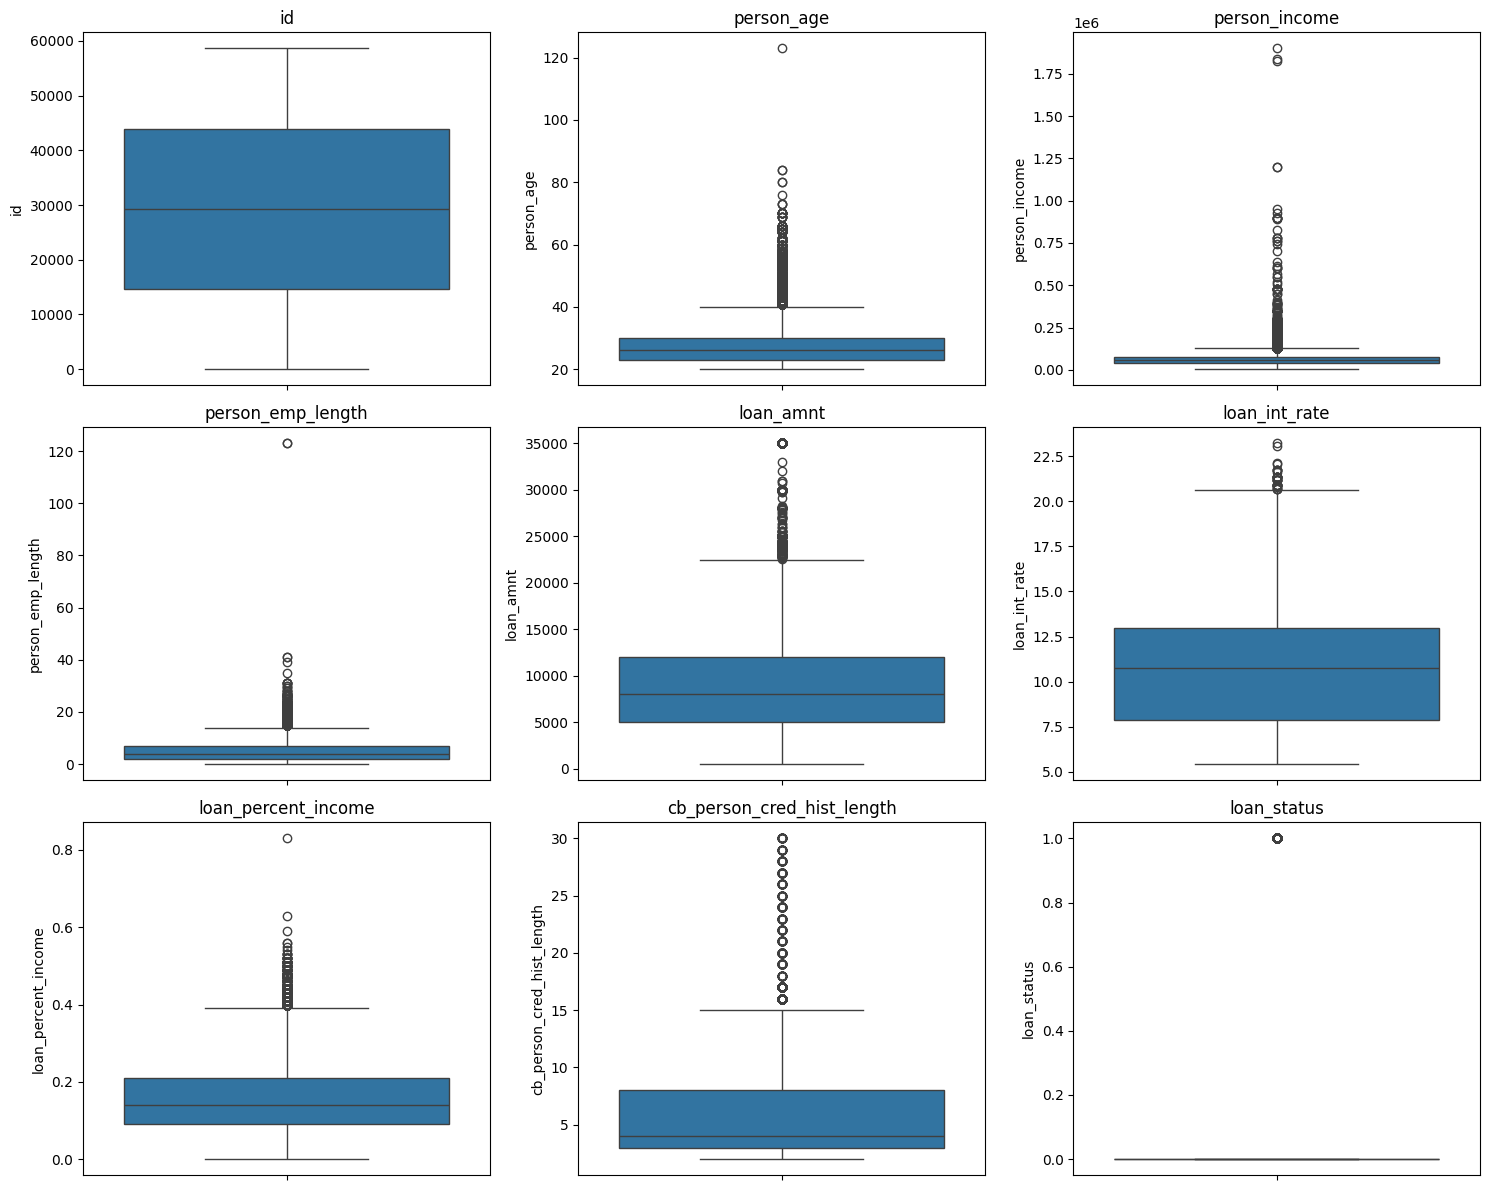

In [ ]:
## boxplot

fig, axes = plt.subplots(3,3 , figsize=(15, 3 * 4))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(df.select_dtypes(include='number')[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
#IQR
Q1=df['person_age'].quantile(0.25)
Q3=df['person_age'].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df = df[(df['person_age'] >= lower_limit) & (df['person_age'] <= upper_limit)]
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [ ]:
x=df.drop(['id','loan_status'],axis=1)
y=df['loan_status']

In [ ]:
non_numeric=x.select_dtypes(exclude=[np.number]).columns
numeric=x.select_dtypes(include=[np.number]).columns

quant=[]
cat=[]

for i in x.columns:
  if i in non_numeric:
    cat.append(i)
  elif len(np.unique(x[i]))<15:
    cat.append(i)
  else:
    quant.append(i)

In [ ]:
for i in non_numeric:
    print(i)
    print(x[i].value_counts())

person_home_ownership
person_home_ownership
RENT        29416
MORTGAGE    23705
OWN          2995
OTHER          83
Name: count, dtype: int64
loan_intent
loan_intent
EDUCATION            11971
MEDICAL              10438
VENTURE               9623
PERSONAL              9347
DEBTCONSOLIDATION     8843
HOMEIMPROVEMENT       5977
Name: count, dtype: int64
loan_grade
loan_grade
A    20143
B    19583
C    10575
D     4766
E      965
F      136
G       31
Name: count, dtype: int64
cb_person_default_on_file
cb_person_default_on_file
N    47881
Y     8318
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

encoders={}
for i in non_numeric:
    le=LabelEncoder()
    le.fit(x[i].astype(str))
    encoders[i]=le

with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [ ]:
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3


In [ ]:
for i in non_numeric:
    x[i]=encoders[i].transform(x[i])

In [ ]:
x

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3
...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10
58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8
58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2
58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56199 entries, 0 to 58644
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  56199 non-null  int64  
 1   person_income               56199 non-null  int64  
 2   person_home_ownership       56199 non-null  int64  
 3   person_emp_length           56199 non-null  float64
 4   loan_intent                 56199 non-null  int64  
 5   loan_grade                  56199 non-null  int64  
 6   loan_amnt                   56199 non-null  int64  
 7   loan_int_rate               56199 non-null  float64
 8   loan_percent_income         56199 non-null  float64
 9   cb_person_default_on_file   56199 non-null  int64  
 10  cb_person_cred_hist_length  56199 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 5.1 MB


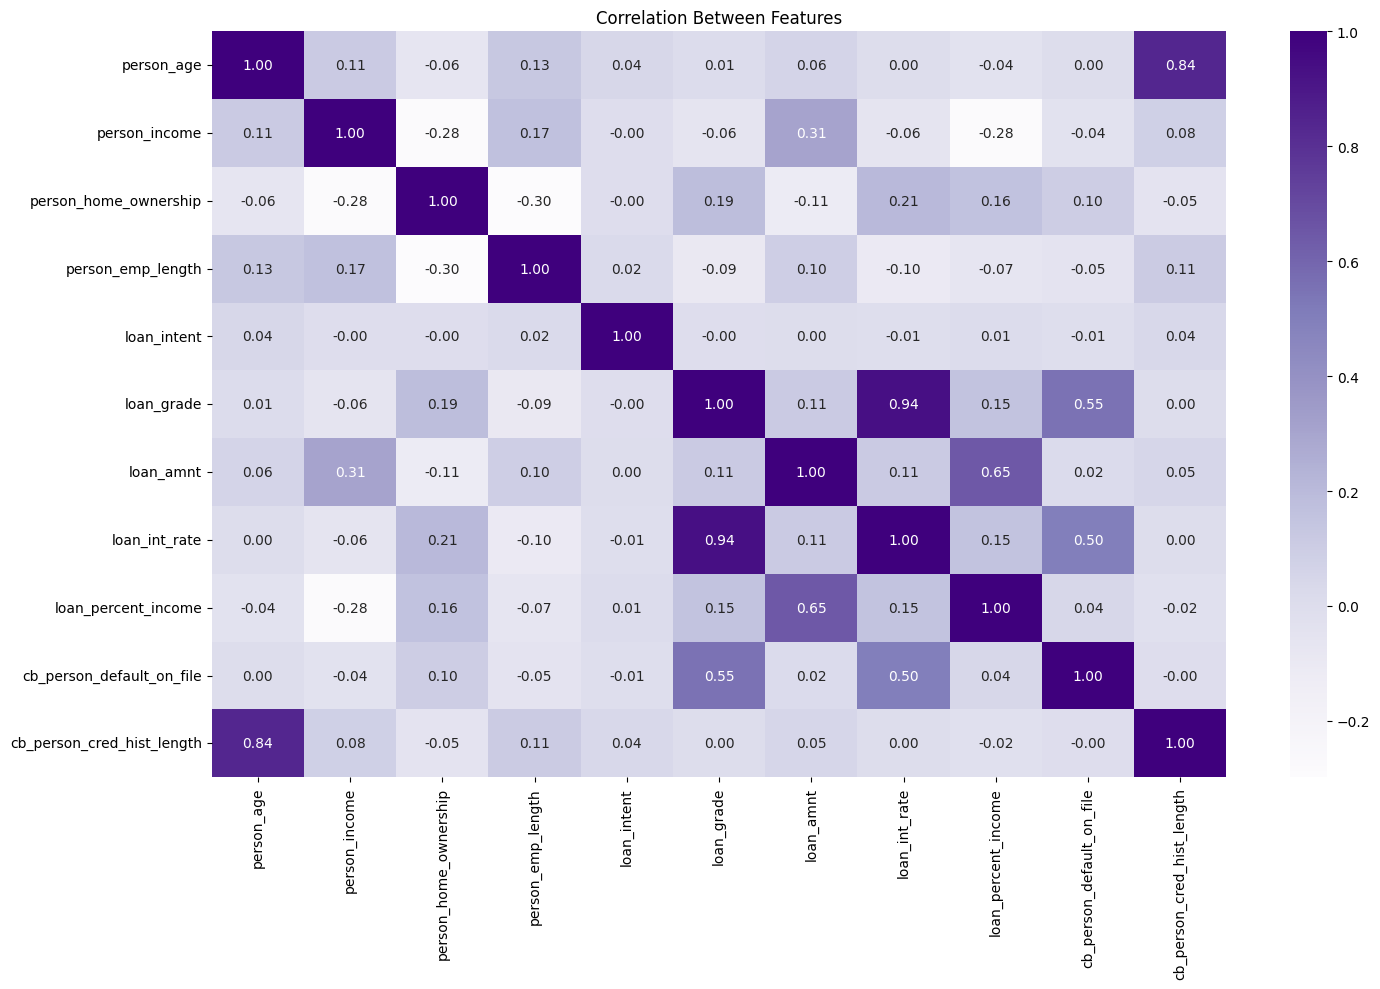

In [ ]:
## correlation between features
plt.figure(figsize=(15,10))
corr=x.corr()
sns.heatmap(corr,cmap='Purples' , annot=True,fmt=".2f")
plt.title("Correlation Between Features")
plt.tight_layout()
plt.show()


In [ ]:
x.drop(['loan_int_rate'],axis=1,inplace=True)

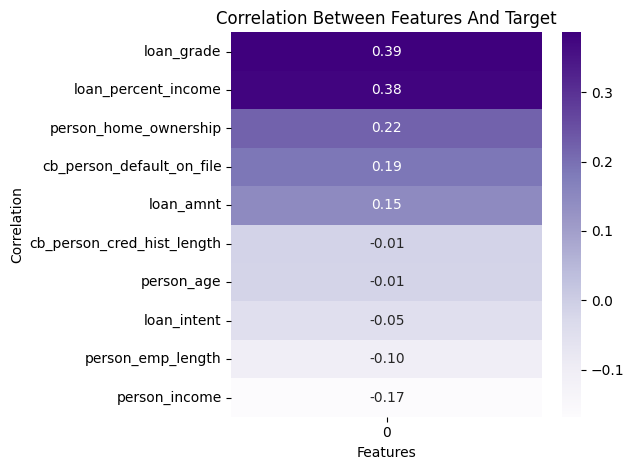

In [ ]:
## correlation between features and target

corr=x.corrwith(y).sort_values(ascending=False)
sns.heatmap(corr.to_frame(),cmap='Purples',annot=True, fmt=".2f")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Correlation Between Features And Target")
plt.tight_layout()
plt.show()

In [ ]:
# balancing

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(x,y)

In [ ]:
y_smote.value_counts()
#

,count
loan_status,
0,48244
1,48244


In [ ]:
Models = ['Logistic Regression','Random Forest','XGBoost','SVM']
Accuracy = []
Recall = []
F1_Score = []

In [ ]:
## split the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [ ]:
## MODEL 1 LOGISTIC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,confusion_matrix,classification_report,f1_score,accuracy_score
lr=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy',
                    n_jobs=-1,
                    verbose=2)

grid.fit(x_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

recall=recall_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
con_mat=confusion_matrix(y_test,y_pred)
class_rep=classification_report(y_test,y_pred)

print(recall)
print(con_mat)
print(class_rep)

Accuracy.append(accuracy)
Recall.append(recall)
F1_Score.append(f1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

0.8057851239669421
[[7607 2011]
 [1880 7800]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      9618
           1       0.80      0.81      0.80      9680

    accuracy                           0.80     19298
   macro avg       0.80      0.80      0.80     19298
weighted avg       0.80      0.80      0.80     19298



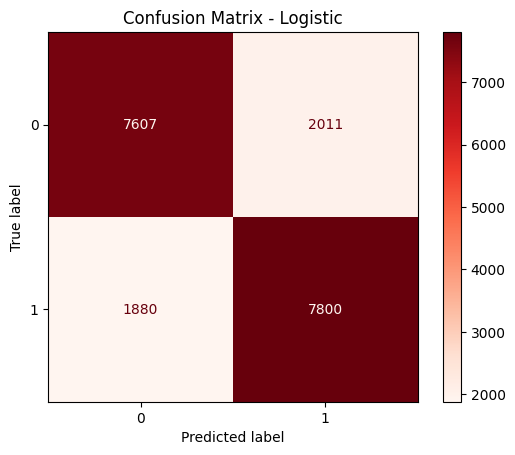

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Reds')
plt.title("Confusion Matrix - Logistic")
plt.show()

In [ ]:
## MODEL 2 RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

recall=recall_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
con_mat=confusion_matrix(y_test,y_pred)
class_rep=classification_report(y_test,y_pred)

print(recall)
print(con_mat)
print(class_rep)

Accuracy.append(accuracy)
Recall.append(recall)
F1_Score.append(f1)

0.9426652892561983
[[9206  412]
 [ 555 9125]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9618
           1       0.96      0.94      0.95      9680

    accuracy                           0.95     19298
   macro avg       0.95      0.95      0.95     19298
weighted avg       0.95      0.95      0.95     19298



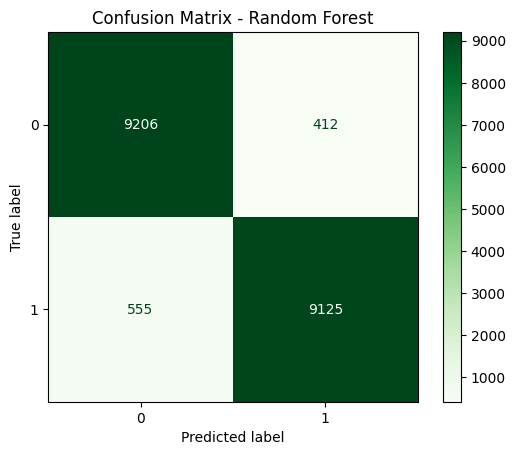

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [ ]:
## MODEL 3 XGBOOST

from xgboost import XGBClassifier
import pickle

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

with open('xgb_model.pkl','wb') as f:
    pickle.dump(xgb,f)

recall=recall_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
con_mat=confusion_matrix(y_test,y_pred)
class_rep=classification_report(y_test,y_pred)

print(recall)
print(con_mat)
print(class_rep)

Accuracy.append(accuracy)
Recall.append(recall)
F1_Score.append(f1)

0.9381198347107438
[[9389  229]
 [ 599 9081]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9618
           1       0.98      0.94      0.96      9680

    accuracy                           0.96     19298
   macro avg       0.96      0.96      0.96     19298
weighted avg       0.96      0.96      0.96     19298



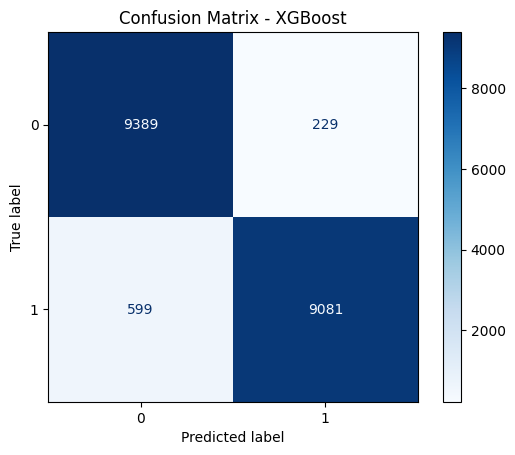

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [ ]:
## Model 4 SVM
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

recall=recall_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
con_mat=confusion_matrix(y_test,y_pred)
class_rep=classification_report(y_test,y_pred)

print(recall)
print(con_mat)
print(class_rep)

Accuracy.append(accuracy)
Recall.append(recall)
F1_Score.append(f1)

0.6269628099173554
[[7746 1872]
 [3611 6069]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74      9618
           1       0.76      0.63      0.69      9680

    accuracy                           0.72     19298
   macro avg       0.72      0.72      0.71     19298
weighted avg       0.72      0.72      0.71     19298



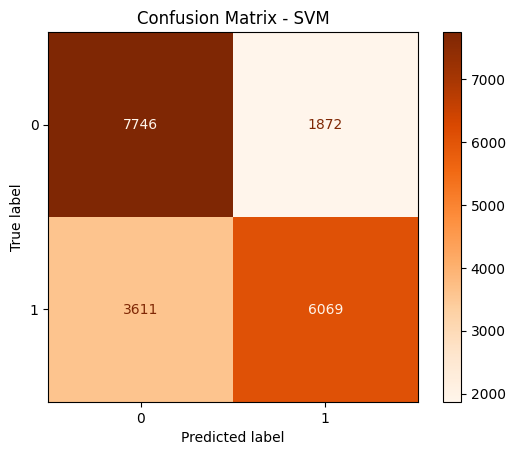

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Oranges')
plt.title("Confusion Matrix - SVM")
plt.show()

In [ ]:
pd.DataFrame({'Models':Models,'Accuracy':Accuracy,'Recall':Recall,'F1_Score':F1_Score})

,Models,Accuracy,Recall,F1_Score
0,Logistic Regression,0.798373,0.805785,0.800369
1,Random Forest,0.949891,0.942665,0.949680
2,XGBoost,0.957094,0.938120,0.956398
3,SVM,0.715877,0.626963,0.688837


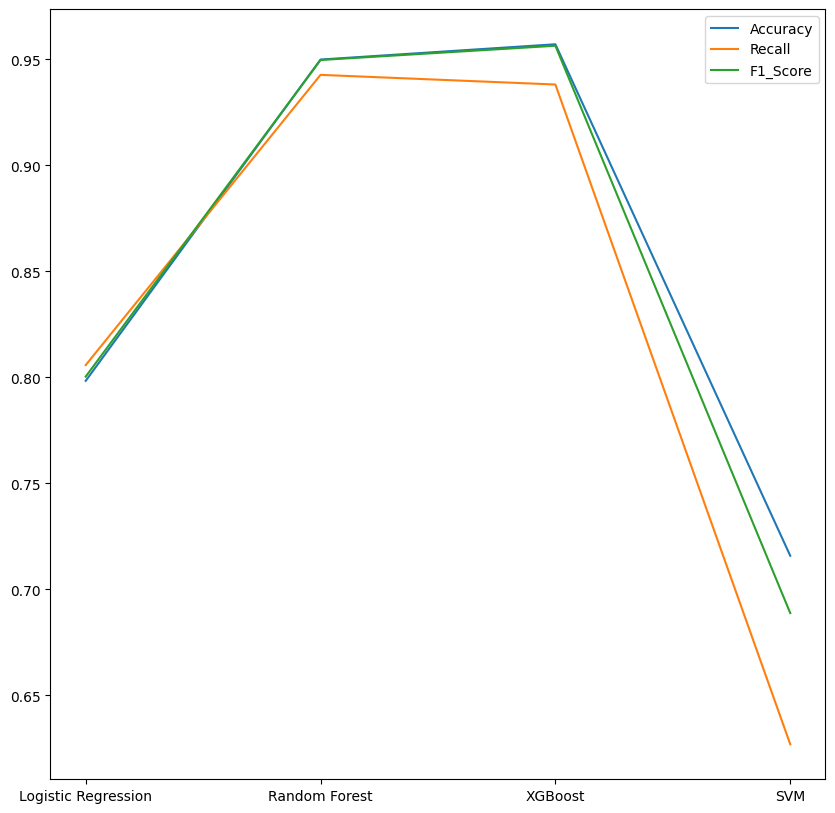

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(Models,Accuracy,label='Accuracy')
plt.plot(Models,Recall,label='Recall')
plt.plot(Models,F1_Score,label='F1_Score')
plt.legend()
plt.show()